In [1]:
# 1

# This notebook is illustrate the color cuts and object lists
# for the various kinds of populations I've segregarted from the
# K vs J-K (CMD_1) and [3.6] vs J-[3.6] (CMD_2) plots.
#
# I will hopefully add [8.0] vs [3.6]-[8.0] (CMD_3) soon.
#
# Although I have been successful in using GlueViz to visualize
# these different populations, I'd like to have more direct
# control over how these plots appear, not only in the CMDs
# but also in RA vs Dec space to show spatial relations.

In [2]:
# 2

# First thing needed is to import the relevant Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
# This line is necessary for the number density histograms.
from astropy import stats
from astropy.stats.histogram import knuth_bin_width
# This line is necessary for determining histogram bin width.

In [3]:
# 3

# For the histograms, I have created new .csv files which have the specific colors'
# information: ID, RA, Dec, magnitudes, magnitude errors, color, color error.
#
# I have pre-trimmed the bogus data from these tables already, so there's no need
# to get rid of the whacky 'null' values converted to "-9999" values
# (which, when subtracted from any other value, gives another bogus value)
# like I did in the previous cell with the "full" catalog.
#
jMINUSkDATA = pd.read_csv('jMINUSk.csv')
jMINUSthreesixDATA = pd.read_csv('jMINUSthreesix.csv')
threesixMINUSeightzeroDATA = pd.read_csv('threesixMINUSeightzero.csv')
#
# For the individual regions (7 in each CMD_1 & CMD_2) I have made individual .csv files
# with the same information as above.
#
CMD1region1 = pd.read_csv('CMD1region1.csv')
CMD1region2 = pd.read_csv('CMD1region2.csv')
CMD1region3 = pd.read_csv('CMD1region3.csv')
CMD1region4 = pd.read_csv('CMD1region4.csv')
CMD1region5 = pd.read_csv('CMD1region5.csv')
CMD1region6 = pd.read_csv('CMD1region6.csv')
CMD1region7 = pd.read_csv('CMD1region7.csv')
CMD2region1 = pd.read_csv('CMD2region1.csv')
CMD2region2 = pd.read_csv('CMD2region2.csv')
CMD2region3 = pd.read_csv('CMD2region3.csv')
CMD2region4 = pd.read_csv('CMD2region4.csv')
CMD2region5 = pd.read_csv('CMD2region5.csv')
CMD2region6 = pd.read_csv('CMD2region6.csv')
CMD2region7 = pd.read_csv('CMD2region7.csv')

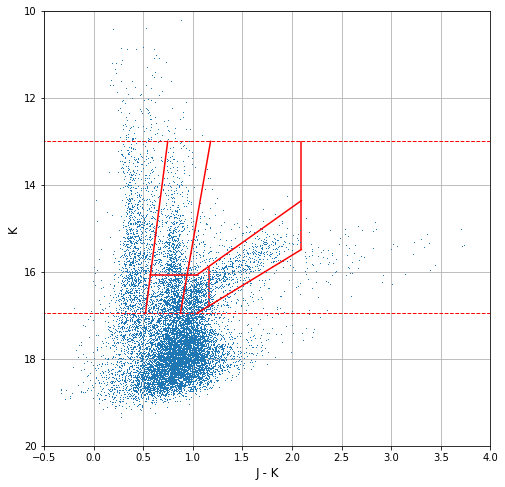

In [4]:
# 4

# Here I will plot the CMDs and the color-cut boundaries that were defined
# using the optimum bin-width Gaussian minimization technique.

# CMD_1 (K vs J-K)

plt.figure(figsize=(8,8))
plt.plot(jMINUSkDATA.jMINUSk, jMINUSkDATA.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)

x_TRGB = np.linspace(-1.0, 5.0, 100)
y_TRGB = 0.0*x_TRGB + 16.955

x_RSGAGB = np.linspace(0.573504, 1.04232, 100)
y_RSGAGB = 0.0*x_RSGAGB + 16.070

x_Boundary1 = np.linspace(0.523352, 0.747474, 100)
y_Boundary1 = -17.646682923941952*x_Boundary1 + 26.19043506987594

x_Boundary2 = np.linspace(0.874783, 1.17936, 100)
y_Boundary2 = -12.985017187060317*x_Boundary2 + 28.314071018698847

x_Boundary3 = np.linspace(1.04232, 2.094, 100)
y_Boundary3 = -1.6229047208512613*x_Boundary3 + 17.761593627226944

x_Boundary4 = np.linspace(1.04072, 2.094, 100)
y_Boundary4 = -1.3927857295083927*x_Boundary4 + 18.404498536837462

extremely_dusty = 2.094
Orich_Crich_boundary = 1.159

plt.vlines(x=extremely_dusty, ymin=15.488, ymax=13.0, color='red')# ymax=14.5158

plt.vlines(x=Orich_Crich_boundary, ymin=16.7903, ymax=15.8806, color='red')

x_bright = np.linspace(-1.0, 5.0, 100)
y_bright = 0.0*x_bright + 13.0
           
# don't forget to plot the lines here
#
plt.plot(x_TRGB, y_TRGB, '--', linewidth=1.0, color='red')
plt.plot(x_RSGAGB, y_RSGAGB, color='red')
plt.plot(x_Boundary1, y_Boundary1, color='red')
plt.plot(x_Boundary2, y_Boundary2, color='red')
plt.plot(x_Boundary3, y_Boundary3, color='red')
plt.plot(x_Boundary4, y_Boundary4, color='red')
plt.plot(x_bright, y_bright, '--', linewidth=1.0, color='red')

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('K_vs_J-K_color-cuts_X-mas.pdf')

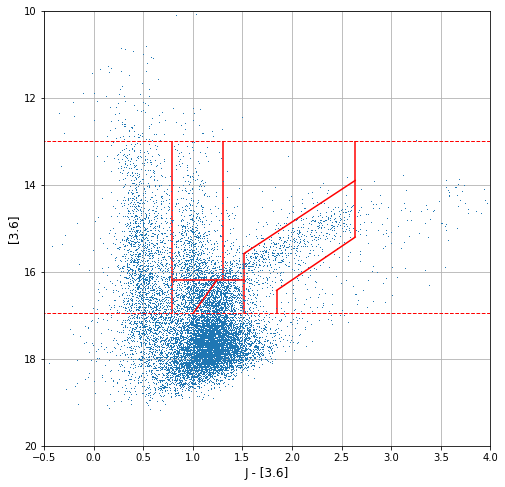

In [5]:
# 5

# Here I will plot the CMDs and the color-cut boundaries that were defined
# using the optimum bin-width Gaussian minimization technique.

# CMD_2 ([3.6] vs J-[3.6])

plt.figure(figsize=(8,8))
plt.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)

TRGB_boundary  = 16.941
RSGAGB_boundary = 16.183
extremely_dusty = 2.637
Boundary1_vert = 0.787
Boundary2_vert = 1.303 # 1.284
Boundary3_vert = 1.518
Boundary4_vert = 1.845

x_TRGB = np.linspace(-1.0, 5.0, 100)
y_TRGB = 0.0*x_TRGB + 16.941

x_bright = np.linspace(-1.0, 5.0, 100)
y_bright = 0.0*x_bright + 13.0

x_RSGAGB = np.linspace(0.787, 1.518, 100) # 1.303, 1.31658
y_RSGAGB = 0.0*x_RSGAGB + 16.183

x_Boundary2 = np.linspace(1.00867, 1.2461, 100)
y_Boundary2 = -3.192424191991447*x_Boundary2 + 20.161094181672897

x_Boundary3 = np.linspace(1.518, 2.637, 100)
y_Boundary3 = -1.4997782178261323*x_Boundary3 + 17.854319551164114

x_Boundary4 = np.linspace(1.845, 2.637, 100)
y_Boundary4 = -1.545598944346125*x_Boundary4 + 19.278556850569064

plt.vlines(x=Boundary1_vert, ymin=16.941, ymax=13.0, color='red')

plt.vlines(x=Boundary2_vert, ymin=16.183, ymax=13.0, color='red')

plt.vlines(x=Boundary3_vert, ymin=16.941, ymax=15.5777, color='red')

plt.vlines(x=Boundary4_vert, ymin=16.941, ymax=16.4269, color='red')

plt.vlines(x=extremely_dusty, ymin=15.2028, ymax=13.0, color='red')

# don't forget to plot the lines here
#
plt.plot(x_TRGB, y_TRGB, '--', linewidth=1.0, color='red')
plt.plot(x_bright, y_bright, '--', linewidth=1.0, color='red')
plt.plot(x_RSGAGB, y_RSGAGB, color='red')
plt.plot(x_Boundary2, y_Boundary2, color='red')
plt.plot(x_Boundary3, y_Boundary3, color='red')
plt.plot(x_Boundary4, y_Boundary4, color='red')

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_color-cuts_X-mas.pdf')

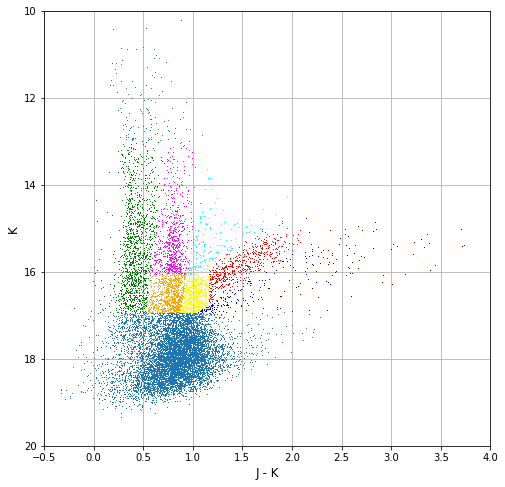

In [6]:
# 6

# With the color-cut boundaries in place on the CMDs, now I can
# overplot the segregated objects lists which I had originally
# done using the program GlueViz.

# CMD_1 (K vs J-K)

plt.figure(figsize=(8,8))
plt.plot(jMINUSkDATA.jMINUSk, jMINUSkDATA.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)

plt.plot(CMD1region1.jMINUSk, CMD1region1.Kmag, ',', color='green')
plt.plot(CMD1region2.jMINUSk, CMD1region2.Kmag, ',', color='magenta')
plt.plot(CMD1region3.jMINUSk, CMD1region3.Kmag, ',', color='orange')
plt.plot(CMD1region4.jMINUSk, CMD1region4.Kmag, ',', color='cyan')
plt.plot(CMD1region5.jMINUSk, CMD1region5.Kmag, ',', color='yellow')
plt.plot(CMD1region6.jMINUSk, CMD1region6.Kmag, ',', color='red')
plt.plot(CMD1region7.jMINUSk, CMD1region7.Kmag, ',', color='blue')

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('K_vs_J-K_color-cuts_populations.pdf')

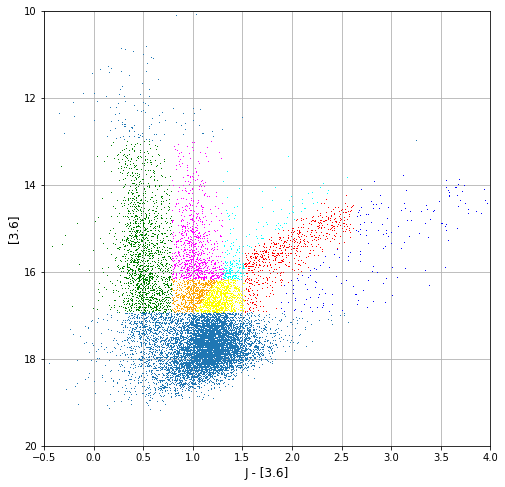

In [7]:
# 7

# With the color-cut boundaries in place on the CMDs, now I can
# overplot the segregated objects lists which I had originally
# done using the program GlueViz.

# CMD_2 ([3.6] vs J-[3.6])

plt.figure(figsize=(8,8))
plt.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, ',')#, color='gray')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)

plt.plot(CMD2region1.jMINUSthreesix, CMD2region1.k36mag, ',', color='green')
plt.plot(CMD2region2.jMINUSthreesix, CMD2region2.k36mag, ',', color='magenta')
plt.plot(CMD2region3.jMINUSthreesix, CMD2region3.k36mag, ',', color='orange')
plt.plot(CMD2region4.jMINUSthreesix, CMD2region4.k36mag, ',', color='cyan')
plt.plot(CMD2region5.jMINUSthreesix, CMD2region5.k36mag, ',', color='yellow')
plt.plot(CMD2region6.jMINUSthreesix, CMD2region6.k36mag, ',', color='red')
plt.plot(CMD2region7.jMINUSthreesix, CMD2region7.k36mag, ',', color='blue')

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_color-cuts_populations.pdf')

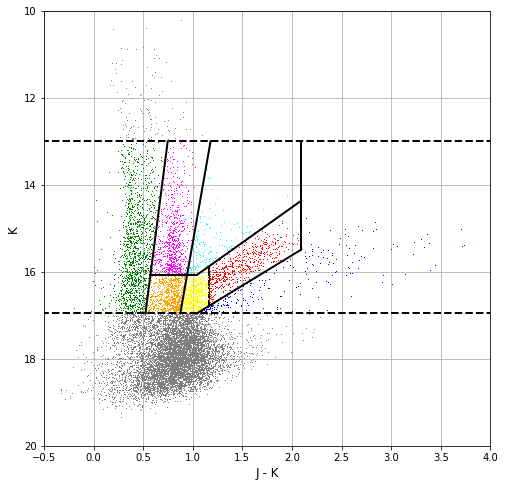

In [8]:
# 8

# Great!  Now that I've successfully re-created the GlueViz plots,
# I can also overlay the color-cut boundaries with the colored points
# to produce "super plots" for each CMD, because why the hell not?

# CMD_1 (K vs J-K)

plt.figure(figsize=(8,8))
plt.plot(jMINUSkDATA.jMINUSk, jMINUSkDATA.Kmag, ',', color='gray')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)

plt.plot(CMD1region1.jMINUSk, CMD1region1.Kmag, ',', color='green')
plt.plot(CMD1region2.jMINUSk, CMD1region2.Kmag, ',', color='magenta')
plt.plot(CMD1region3.jMINUSk, CMD1region3.Kmag, ',', color='orange')
plt.plot(CMD1region4.jMINUSk, CMD1region4.Kmag, ',', color='cyan')
plt.plot(CMD1region5.jMINUSk, CMD1region5.Kmag, ',', color='yellow')
plt.plot(CMD1region6.jMINUSk, CMD1region6.Kmag, ',', color='red')
plt.plot(CMD1region7.jMINUSk, CMD1region7.Kmag, ',', color='blue')

x_TRGB = np.linspace(-1.0, 5.0, 100)
y_TRGB = 0.0*x_TRGB + 16.955

x_RSGAGB = np.linspace(0.573504, 1.04232, 100)
y_RSGAGB = 0.0*x_RSGAGB + 16.070

x_Boundary1 = np.linspace(0.523352, 0.747474, 100)
y_Boundary1 = -17.646682923941952*x_Boundary1 + 26.19043506987594

x_Boundary2 = np.linspace(0.874783, 1.17936, 100)
y_Boundary2 = -12.985017187060317*x_Boundary2 + 28.314071018698847

x_Boundary3 = np.linspace(1.04232, 2.094, 100)
y_Boundary3 = -1.6229047208512613*x_Boundary3 + 17.761593627226944

x_Boundary4 = np.linspace(1.04072, 2.094, 100)
y_Boundary4 = -1.3927857295083927*x_Boundary4 + 18.404498536837462

extremely_dusty = 2.094
Orich_Crich_boundary = 1.159

plt.vlines(x=extremely_dusty, ymin=15.488, ymax=13.0, linewidth=2.0, color='black')# ymax=14.5158

plt.vlines(x=Orich_Crich_boundary, ymin=16.7903, ymax=15.8806, linewidth=2.0, color='black')

x_bright = np.linspace(-1.0, 5.0, 100)
y_bright = 0.0*x_bright + 13.0
           
# don't forget to plot the lines here
#
plt.plot(x_TRGB, y_TRGB, '--', linewidth=2.0, color='black')
plt.plot(x_RSGAGB, y_RSGAGB, linewidth=2.0, color='black')
plt.plot(x_Boundary1, y_Boundary1, linewidth=2.0, color='black')
plt.plot(x_Boundary2, y_Boundary2, linewidth=2.0, color='black')
plt.plot(x_Boundary3, y_Boundary3, linewidth=2.0, color='black')
plt.plot(x_Boundary4, y_Boundary4, linewidth=2.0, color='black')
plt.plot(x_bright, y_bright, '--', linewidth=2.0, color='black')

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('K_vs_J-K_color-cuts_populations_boundaries.pdf')

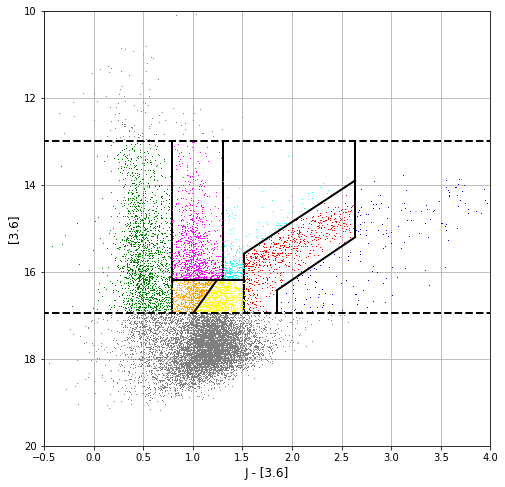

In [9]:
# 9

# Great!  Now that I've successfully re-created the GlueViz plots,
# I can also overlay the color-cut boundaries with the colored points
# to produce "super plots" for each CMD, because why the hell not?

# CMD_2 ([3.6] vs J-[3.6])

plt.figure(figsize=(8,8))
plt.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, ',', color='gray')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)

plt.plot(CMD2region1.jMINUSthreesix, CMD2region1.k36mag, ',', color='green')
plt.plot(CMD2region2.jMINUSthreesix, CMD2region2.k36mag, ',', color='magenta')
plt.plot(CMD2region3.jMINUSthreesix, CMD2region3.k36mag, ',', color='orange')
plt.plot(CMD2region4.jMINUSthreesix, CMD2region4.k36mag, ',', color='cyan')
plt.plot(CMD2region5.jMINUSthreesix, CMD2region5.k36mag, ',', color='yellow')
plt.plot(CMD2region6.jMINUSthreesix, CMD2region6.k36mag, ',', color='red')
plt.plot(CMD2region7.jMINUSthreesix, CMD2region7.k36mag, ',', color='blue')

TRGB_boundary  = 16.941
RSGAGB_boundary = 16.183
extremely_dusty = 2.637
Boundary1_vert = 0.787
Boundary2_vert = 1.303 # 1.284
Boundary3_vert = 1.518
Boundary4_vert = 1.845

x_TRGB = np.linspace(-1.0, 5.0, 100)
y_TRGB = 0.0*x_TRGB + 16.941

x_bright = np.linspace(-1.0, 5.0, 100)
y_bright = 0.0*x_bright + 13.0

x_RSGAGB = np.linspace(0.787, 1.518, 100) # 1.303, 1.31658
y_RSGAGB = 0.0*x_RSGAGB + 16.183

x_Boundary2 = np.linspace(1.00867, 1.2461, 100)
y_Boundary2 = -3.192424191991447*x_Boundary2 + 20.161094181672897

x_Boundary3 = np.linspace(1.518, 2.637, 100)
y_Boundary3 = -1.4997782178261323*x_Boundary3 + 17.854319551164114

x_Boundary4 = np.linspace(1.845, 2.637, 100)
y_Boundary4 = -1.545598944346125*x_Boundary4 + 19.278556850569064

plt.vlines(x=Boundary1_vert, ymin=16.941, ymax=13.0, linewidth=2.0, color='black')

plt.vlines(x=Boundary2_vert, ymin=16.183, ymax=13.0, linewidth=2.0, color='black')

plt.vlines(x=Boundary3_vert, ymin=16.941, ymax=15.5777, linewidth=2.0, color='black')

plt.vlines(x=Boundary4_vert, ymin=16.941, ymax=16.4269, linewidth=2.0, color='black')

plt.vlines(x=extremely_dusty, ymin=15.2028, ymax=13.0, linewidth=2.0, color='black')

# don't forget to plot the lines here
#
plt.plot(x_TRGB, y_TRGB, '--', linewidth=2.0, color='black')
plt.plot(x_bright, y_bright, '--', linewidth=2.0, color='black')
plt.plot(x_RSGAGB, y_RSGAGB, linewidth=2.0, color='black')
plt.plot(x_Boundary2, y_Boundary2, linewidth=2.0, color='black')
plt.plot(x_Boundary3, y_Boundary3, linewidth=2.0, color='black')
plt.plot(x_Boundary4, y_Boundary4, linewidth=2.0, color='black')

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_color-cuts_populations_boundaries.pdf')

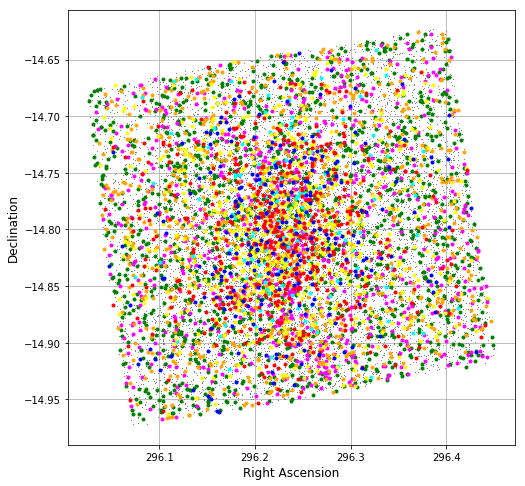

In [10]:
# 10

# The next thing to check out is what kind of spatial distribution the various
# populations have in NGC 6822.
#
# So I will plot the RA & Dec of the sources and see where the colored points
# wind up once overplotted.

# CMD_1 (K vs J-K)

plt.figure(figsize=(8,8))
plt.plot(jMINUSkDATA.RA, jMINUSkDATA.Dec, ',', color='gray')
#plt.xlim(-0.5, 4.0)
#plt.ylim(20.0, 10.0)
plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.plot(CMD1region1.RA, CMD1region1.Dec, '.', color='green')
plt.plot(CMD1region2.RA, CMD1region2.Dec, '.', color='magenta')
plt.plot(CMD1region3.RA, CMD1region3.Dec, '.', color='orange')
plt.plot(CMD1region4.RA, CMD1region4.Dec, '.', color='cyan')
plt.plot(CMD1region5.RA, CMD1region5.Dec, '.', color='yellow')
plt.plot(CMD1region6.RA, CMD1region6.Dec, '.', color='red')
plt.plot(CMD1region7.RA, CMD1region7.Dec, '.', color='blue')

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('K_vs_J-K_spatial_plot.pdf')

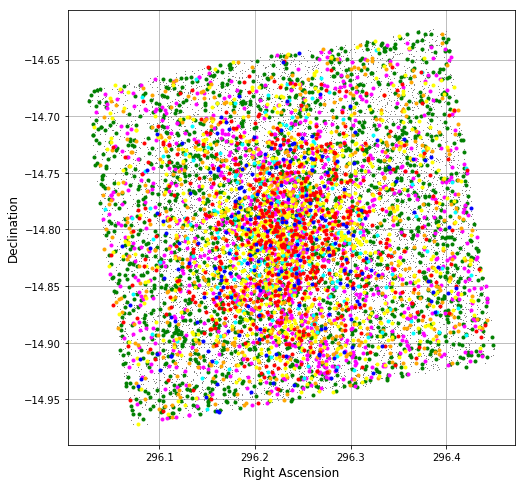

In [11]:
# 11

# The next thing to check out is what kind of spatial distribution the various
# populations have in NGC 6822.
#
# So I will plot the RA & Dec of the sources and see where the colored points
# wind up once overplotted.

# CMD_2 ([3.6] vs J-[3.6])

plt.figure(figsize=(8,8))
plt.plot(jMINUSthreesixDATA.RA, jMINUSthreesixDATA.Dec, ',', color='gray')
#plt.xlim(-0.5, 4.0)
#plt.ylim(20.0, 10.0)
plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.plot(CMD2region1.RA, CMD2region1.Dec, '.', color='green')
plt.plot(CMD2region2.RA, CMD2region2.Dec, '.', color='magenta')
plt.plot(CMD2region3.RA, CMD2region3.Dec, '.', color='orange')
plt.plot(CMD2region4.RA, CMD2region4.Dec, '.', color='cyan')
plt.plot(CMD2region5.RA, CMD2region5.Dec, '.', color='yellow')
plt.plot(CMD2region6.RA, CMD2region6.Dec, '.', color='red')
plt.plot(CMD2region7.RA, CMD2region7.Dec, '.', color='blue')

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_spatial_plot.pdf')

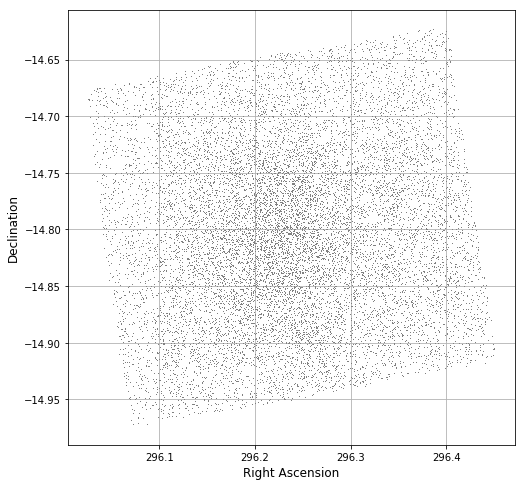

In [12]:
# 12

# Okay, so instead of throwing all of the various colors on these plots,
# I am going to isolate them one at a time.

# CMD_1 (K vs J-K)

plt.figure(figsize=(8,8))
plt.plot(jMINUSkDATA.RA, jMINUSkDATA.Dec, ',', color='gray')
#plt.xlim(-0.5, 4.0)
#plt.ylim(20.0, 10.0)
plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

#plt.plot(CMD1region1.RA, CMD1region1.Dec, '.', color='green')
#plt.plot(CMD1region2.RA, CMD1region2.Dec, '.', color='magenta')
#plt.plot(CMD1region3.RA, CMD1region3.Dec, '.', color='orange')
#plt.plot(CMD1region4.RA, CMD1region4.Dec, '.', color='cyan')
#plt.plot(CMD1region5.RA, CMD1region5.Dec, '.', color='yellow')
#plt.plot(CMD1region6.RA, CMD1region6.Dec, '.', color='red')
#plt.plot(CMD1region7.RA, CMD1region7.Dec, '.', color='blue')

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('K_vs_J-K_spatial_plot_region0.pdf')

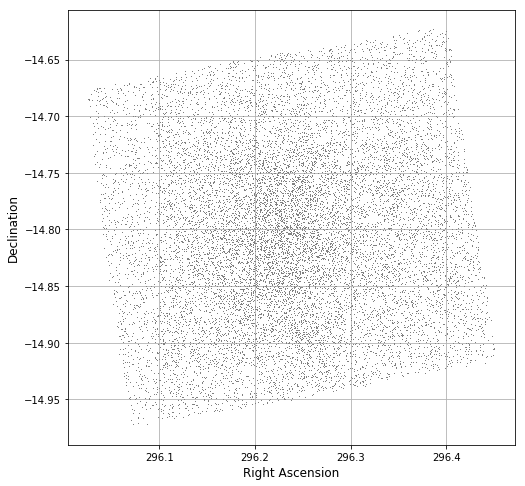

In [13]:
# 13

# Okay, so instead of throwing all of the various colors on these plots,
# I am going to isolate them one at a time.

# CMD_2 ([3.6] vs J-[3.6])

plt.figure(figsize=(8,8))
plt.plot(jMINUSthreesixDATA.RA, jMINUSthreesixDATA.Dec, ',', color='gray')
#plt.xlim(-0.5, 4.0)
#plt.ylim(20.0, 10.0)
plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

#plt.plot(CMD2region1.RA, CMD2region1.Dec, '.', color='green')
#plt.plot(CMD2region2.RA, CMD2region2.Dec, '.', color='magenta')
#plt.plot(CMD2region3.RA, CMD2region3.Dec, '.', color='orange')
#plt.plot(CMD2region4.RA, CMD2region4.Dec, '.', color='cyan')
#plt.plot(CMD2region5.RA, CMD2region5.Dec, '.', color='yellow')
#plt.plot(CMD2region6.RA, CMD2region6.Dec, '.', color='red')
#plt.plot(CMD2region7.RA, CMD2region7.Dec, '.', color='blue')

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_spatial_plot_region0.pdf')

In [14]:
# 14

# How many sources are in each list?
# What kind of object exists in each region?

print len(CMD1region1)
print len(CMD1region2)
print len(CMD1region3)
print len(CMD1region4)
print len(CMD1region5)
print len(CMD1region6)
print len(CMD1region7)
print ''
print len(CMD2region1)
print len(CMD2region2)
print len(CMD2region3)
print len(CMD2region4)
print len(CMD2region5)
print len(CMD2region6)
print len(CMD2region7)

# Region 1: foreground stars + main sequence
# Region 2: O-rich RSGs
# *Region 3: O-rich AGBs
# Region 4: O-rich & C-rich RSGs
# *Region 5: O-rich AGBs (first dusty track)
# *Region 6: C-rich AGBs
# Region 7: dusty AGBs + YSOs

# CMD_1 (K vs J-K)
#
# O-rich AGBs: 818 + 661 = 1,479
# C-rich AGBs: 531
# dusty AGBs + YSOs: 244

# CMD_2 ([3.6] vs J-[3.6])
#
# O-rich AGBs: 599 + 857 = 1,456
# C-rich AGBs: 643
# dusty AGBs + YSOs: 201

# These numbers aren't exactly the same, but they're pretty close!
# I haven't done the analysis for [8.0] vs [3.6]-[8.0] yet,
# but I'd be curious as to how that matches up considering its
# appearence is fairly different compared to the first two CMDs.

1375
705
818
153
661
531
244

1712
935
599
240
857
643
201
